# P-значение (P-value)

В конце прошлого секминара мы задали вопрос: "В какой момент корреляция начинает быть высокой?"

Хоть мы и знаем, что чем ближе коэффициент корреляции к единице (либо к минус единице), тем "лучше", так как это означает, что у нас имеется некая зависимость между двумя величинами.

Однако каким образом нам определить величину корреляции, на которой мы можем уверенно сказать, что её достаточно, чтобы говорить о зависимости?

Для того, чтобы ответить на этот вопрос в ведём понятие ошибки.

Ошибка — это когда наше предположение не совпадает с действительностью.

Предположим, есть какое-то утверждение, на котроте можно ответить либо "Да", либо "Нет". Например — определить является ли человек беременным.

И у нас есть всего лишь два способа ошибиться в этом случае:

Сказать не беременному человеку, что он беременный, — это называется "ошибкой первого рода", либо же ложноположительным результатом;

И наоборот, сказать беременному человеку, что он не беременный, — это называется "ошибкой второго рода", либо же ложноотрицательным результатом;.

![error_types](images/error_types.png)

Как мы видим из данной ситуации — ошибки второго рода, чаще всего, более опасны, чем ошибки первого рода.

Сказать больному человеку, что он здоров зачастую бывает гораздо хуже, нежели чем сказать здоровому, что он болен, ведь в первом случае мы гарантированно не станем лечить того, кто в лечении однозначно нуждался. Именно поэтому ложноотрицательные срабатывания наиболее нежелательны как в медицине, так и в науке — представьте, что вы проводили большой, дорогой и сложный эксперимент, а потом решили, что он не имеет никакого смысла, в то время как на самом деле он очень даже имел. Вы мало того, что потратили время, силы и ресурсы, так ещё и упустили желаемый результат.

Конечно, если мы очень боимся пропустить по-настоящему больных, было бы куда безопаснее говорить всем приходящим к врачу, что они больны и немедленно начинать лечение, в надежде, что пройдясь по пациентам широким фронтом, мы точно не упустим ни одного больного, одако в реальности у нас нет столько ресурсов, чтобы так поступать.

Однако "перебдеть" всё ещё лучше, чем "недобдеть", именно поэтому в статистике принято фиксировать процент ошибок первого рода (т.е. количество ложноположительных срабатываний), с которыми мы согласно смириться.

Процент ошибок первого рода, мы называем P-значением (P-value).

Исторически сложилось, что пороговыми значениями P-значения в большинстве работ являются $0.05$, $0.01$ и $0.001$, то есть, соответственно, $5\%$, $1\%$ или $0.1\%$ ошибок первого рода. Если в конкретном случае P-значение не превышает данные пороги, то считается, что наше утверждение скорее всего не ошибочное. В ином же случае, быть уверенным в правдивости утверждения мы не можем

# Статистическа значимость корреляции

Как всё выше сказанное связано с изначальным вопросом?

"В какой момент корреляция начинает быть высокой?"

Самым прямым: корреляция начинает быть высокой в тот момент, когда её p-значение меньше, чем установленный нами порог ошибки первого рода.

Каким же образом нам вычислять p-значение для нашей корреляции? Всё, что у нас имеется — это два ряда чисел, для которых мы, по формуле, считаем корреляцию. Мы не знаем — есть ли в реальности зависимость между этими двумя рядами или нет, как мы можем говорить о том, ошиблись мы, сказав, что корреляция высокая (или, ещё говорят, статистически значимая) и два ряда зависят друг от друга, или нет?

Чтобы решить эту проблему — пойдём от обратного.

Создадим такую ситуацию, в которой мы гарантированно знаем, что никакой корреляции нет: сгенерируем два ряда случайных чисел.

И посчитаем для них корреляцию.

И сделаем так очень много раз.

А потом проверим насколько часто в такой ситуации возникает статистически значимая корреляция

(то есть, как часто у нас появляются достаточно большие коэффициенты корреляции в ситуации, когда гарантированно никаких зависимостей нет). 

Реализуем всё в виде программы.

Для начала подключим требуемые пакеты: `matplotlib.pyplot` для работы с графиками

In [1]:
import matplotlib.pyplot as plt

И математический пакет `numpy`, для генерации рядов случайных чисел и вычисления их корреляции:

In [ ]:
import numpy as np

Пр помощи функции `np.random.rand`, мы можем генерировать ряды случайных чисел заданной длины:

In [12]:
np.random.rand(3)

array([0.31071202, 0.18683818, 0.82244622])

А при помощи функции `np.corrcoef(x, y)` мы получаем корреляционную матрицу между величинами:

In [58]:
np.corrcoef(
    [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
    [1.1, 1.9, 3.3, 3.9, 4.8, 6.2]
)

array([[1.        , 0.99447516],
       [0.99447516, 1.        ]])

Поскольку у нас всего два ряда чисел, нас интересует только корреляция между первым рядом и вторым. Как видим, она расположена либо в первой сроке и втором столбце корреляционной матрицы, либо во второй строке и первом столбце (корреляционная матрица симметрична — корреляция между $X$ и $Y$ равна корреляции между $Y$ и $X$. А корреляция между $X$ и $X$ равна единице, так же как и между $Y$ и $Y$).

Поэтому, будем брать только элемент матрицы с индексами [0, 1] (первая строка, второй столбец — помним, что нумерация в Python идёт с нуля):

In [59]:
np.corrcoef(
    [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
    [1.1, 1.9, 3.3, 3.9, 4.8, 6.2]
)[0, 1]

0.9944751561687871

Напишем функцию, которая будет считать корреляцию, между двумя рядами случайных чисел, длины $n$:

In [36]:
def get_random_corr(n=3):
    return np.corrcoef(np.random.rand(n), np.random.rand(n))[0,1]

А теперь 

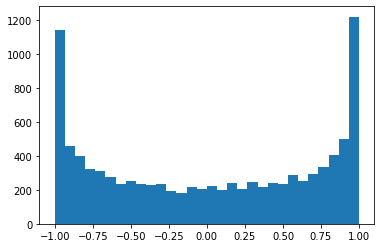

In [62]:
n = 3

random_corrs = [get_random_corr(n) for el in range(10000)]

plt.hist(random_corrs, bins=30)
plt.show()

In [63]:
els = [el for el in random_corrs if el >= 0.99]

In [65]:
len(els)/10000

0.0476

In [66]:
els = [el for el in random_corrs if el <= -0.99]

In [67]:
len(els)/10000

0.048